In [1]:
import sys
sys.path.append('/home/g34/robot')

import numpy as np
from matplotlib import pyplot as plt

from navigation.motor import Motor
from navigation.kinematics import DiffDriveModel
from navigation.controller import PIController

max_count = 48 * 75
motorL = Motor(in1=5, in2=6, enable=13, freq=100, encA=23, encB=24, max_count=max_count)
motorR = Motor(in1=17, in2=27, enable=22, freq=100, encA=19, encB=26, max_count=max_count)

encoder_delay = 0.02
dt = 2 * encoder_delay + 0.00127
model = DiffDriveModel(motorL=motorL, motorR=motorR, dt=dt, wheel_radius=0.028, wheel_sep=0.22, encoder_delay=encoder_delay)


/home/g34/.local/lib/python3.10/site-packages/gpiozero/devices.py:300: PinFactoryFallback: Falling back from lgpio: No module named 'lgpio'
  warnings.warn(


In [2]:
t = int(2 / dt)
hold = np.full(t, 0.3)
up = np.linspace(0, 0.3, t)
down = np.linspace(0.3, 0, t)
vref = np.concatenate([up, hold, down])

In [3]:
def trial(Kp, Ki):
    ssd, wl, wr, v_list = 0, 0, 0, []
    controller = PIController(Kp=Kp, Ki=Ki, wheel_radius=0.028, wheel_sep=0.22)

    for v_hat in vref:
        dutyL, dutyR = controller.drive(v_hat, 0, wl=wl, wr=wr)
        model.pose_update(dutyL, dutyR)
        
        wl, wr, v, w = model.read_velocities()
        ssd = ssd + (v_hat - v)**2
        v_list.append(v)
    
    model.pose_update(0, 0)
    return ssd, v

0.7975558414988684


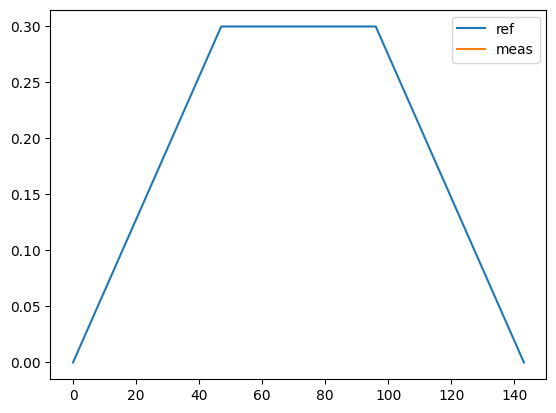

In [11]:
ssd, v = trial(Kp=0.1, Ki=0.002)

print(ssd)

plt.plot(vref, label='ref')
plt.plot(v, label='meas')
plt.legend()